# Convolutional Neural Network (CNN)

In [1]:
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from pathlib import Path
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import warnings # supress warnings
#
#
##### Website #####
#Introduction to Convolutional Neural Networks:
#https://www.tomasbeuzen.com/deep-learning-with-pytorch/chapters/chapter5_cnns-pt1.html

![alternative text](67201cnn.jpeg)

1.nn.Conv2d is used to define the convolutional layers. We define the channels they receive and how much should they return along with the kernel size. We start from 3 channels, as we are using RGB images

2.nn.MaxPool2d is a max-pooling layer that just requires the kernel size and the stride

3.nn.Linear is the fully connected layer, and nn.ReLU is the activation function used

![alternative text](cnn.png)

1.Convolutional Layer

The convolutional layer is used to extract features from the input image. It is a mathematical operation between the input image and the kernel (filter). The filter is passed through the image and the output is calculated as follows:

![alternative text](Convolutional.webp)


Convolution: 
In convolution it takes an input image and applies filters on the image, then it will multiply the input image with filters to get the new image. For example, consider the 5x5 image matrix with pixel values are 0 and 1 and the filter image matrix is 3x3. This 5x5 image matrix and 3x3 filter image matrix together perform a multiplication operation. This output is called a “feature map”. We perform multiple convolutions on images with several filters that give different feature maps. We further combine all feature maps to get a new image. Using different filters, we will carry out the end quantity of operations including aspect detection, blur, and sharpen.


Strides:
Strides describe how many steps does convolution filter has to move in each step. Its default value is 1. We can give higher values to reduce overlap problems between fields. This can reduce the size of the feature map.


Padding:
Padding is the technique used to reduce the image dimensions whereas the filter does not perfectly fit the input image. In padding, we can perform two operations, 1. we can pad the bits into zeros, this method is called zero-padding. 2.we can delete the part of the image where the filter is not exactly fitted, this method is called valid padding because it consists only valid padding bits.

Padding:
When we apply a kernel to the image tensor in convolution, it reduces the size of the output tensor for the image. It causes two problems, first, it shrinks the output and the second is that pixel on the corner of the image losses its importance.
To resolve these issues we increase the shape of the image by adding some extra pixels to the border of the image tensor. It helps to increase the size of the image, and the pixel value of boundaries of images shifted inside the tensor. The features learned from them conveyed to further layers in deep neural networks.


In the image below zero-padding added to the 2-D tensor.

![alternative text](Figure_3.png)

2.ReLU layer
Non-linear function:
We can use different functions such as tanh, sigmoid, ReLU function. These functions are used to make all negative values changes to either zeros or positive values. In these functions, the ReLU function is most accurate because it makes all negative values into zeros and performance-wise is superior as well. The output of ReLU is f(x)=max (0, x).

3.Pooling layer:
The pooling layer is another block of CNN. It is mainly used for dimensionality reduction. This is one of the best technique to reduce overfitting problem. It is also used to detect the edges, corners, etc using multiple filters. There are two types of pooling.
Pooling layers are used to reduce the size of any image while maintaining the most important features. The most common types of pooling layers used are max and average pooling which take the max and the average value respectively from the given size of the filter (i.e, 2x2, 3x3, and so on).
a.Max pooling layer
b.Min pooling layer
c.Average pooling layer
d.Global pooling layer

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import torch
#from torchsummary import summary
import matplotlib.pyplot as plt
#from utils.plotting import *
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'axes.grid': False})

The number of channels:  torch.Size([400, 600, 3])
image has 3 channels


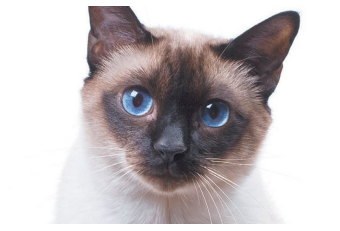

In [3]:
image = torch.from_numpy(plt.imread("A-Siamese-cat.jpg"))
#how to get the number of channels from an image
#It provides you the shape of img in all directions. ie number of rows, number of columns for a 2D
print("The number of channels: ",image.shape)
channels = image.shape[-1]
print("image has", channels, "channels")
plt.imshow(image, cmap='gray')
plt.axis('off');

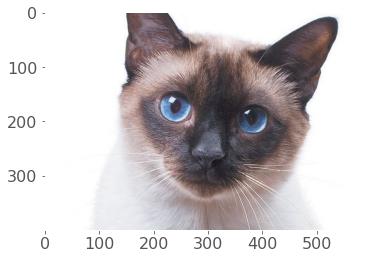

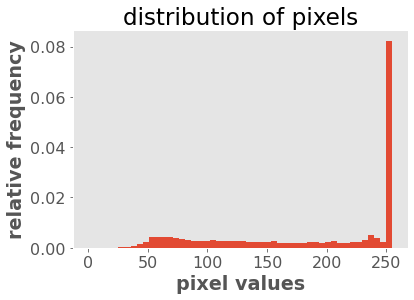

In [22]:
img_pil = Image.open("A-Siamese-cat.jpg")
plt.imshow(img_pil, cmap='gray')
plt.show()
plt.close()
plt.hist(np.array(img_pil).ravel(), bins=50, density=True);
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels");

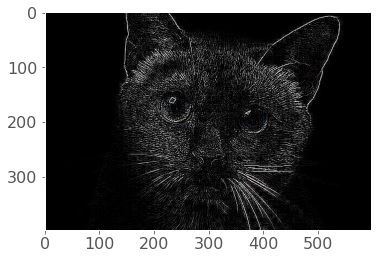

In [4]:
def apply_convolution(img:np.array, kernel:np.array):
    
    # Get the height, width, and number of channels of the image
    height,width,c =img.shape[0],img.shape[1],img.shape[2]
    
    # Get the height, width, and number of channels of the kernel
    kernel_height,kernel_width = kernel.shape[0],kernel.shape[1]
    
    # Create a new image of original img size minus the border 
    # where the convolution can't be applied
    new_img = np.zeros((height-kernel_height+1,width-kernel_width+1,3)) 
    
    # Loop through each pixel in the image
    # But skip the outer edges of the image
    for i in range(kernel_height//2, height-kernel_height//2-1):
        for j in range(kernel_width//2, width-kernel_width//2-1):
            # Extract a window of pixels around the current pixel
            window = img[i-kernel_height//2 : i+kernel_height//2+1,j-kernel_width//2 : j+kernel_width//2+1]
            
            # Apply the convolution to the window and set the result as the value of the current pixel in the new image
            new_img[i, j, 0] = int((window[:,:,0] * kernel).sum())
            new_img[i, j, 1] = int((window[:,:,1] * kernel).sum())
            new_img[i, j, 2] = int((window[:,:,2] * kernel).sum())
      
    # Clip values to the range 0-255
    new_img = np.clip(new_img, 0, 255)
    return new_img.astype(np.uint8)

if __name__ == "__main__":

    # kernel for edge detection
    kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
    
    # kernel for vertical edge detection
    #kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

    # kernel for horizontal edge detection
    # kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

    # Kernel for box blur 
    # kernel = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

    # Open the image and convert it to an array
    # Try to put your own picture!
    img = Image.open('A-Siamese-cat.jpg')
    or_img = np.asarray(img)
    
    new_img = apply_convolution(or_img, kernel)

    # Create a PIL image from the new image and display it     
    sImg = Image.fromarray(new_img)
    plt.imshow(sImg, cmap='gray')
    #sImg.show() 

How to use PyTorch nn Conv2d:

Syntax:

The syntax of PyTorch nn conv2d is:

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)


Parameters:


The following are the parameters of PyTorch nn conv2d:

1.in_channels is used as several channels in the input image.

2.out_channels is used as the number of channels produced by the convolution.

3.kernel_size is used to define the size of the convolving kernel.

4.stride is used to control the stride for the cross-correlation, a single number, or a tuple. the default value of the stride is 1.

5.padding is used to control the amount of padding applied to the input. It can be either string or a tuple of giving the amount of implicit padding. The default value of padding is 0.
dilation is used to control the spacing between the kernel elements and the default value of the dilation is 1.

6.groups are used to control the connection between the inputs and outputs. The default value of groups is 1.
bias: The default value of the bias is True. If it is true it adds a learnable bias to the output. If it is false it does not add any learnable bias to the output.


# Normalizing Images in PyTorch

In [170]:
# import necessary libraries
import torchvision
import torchvision.transforms as Tr

#Normalize Data Manually
def NormalizeTensorStd(data):
    return (data - torch.min(data)) / (torch.max(data) - torch.min(data))

#print("Before applying Normalize Data Manually:")
tensor_image = torch.from_numpy(plt.imread("A-Siamese-cat.jpg"))
scaled_x = NormalizeTensorStd(tensor_image)
print(scaled_x[:1,:,:])

#print("Before applying .transforms.Normalize:")
img_pil = Image.open("news.jpg")
NormalizeTensor = Tr.Compose([
    # to tensor
    Tr.ToTensor(),
    # normalize
    # from [0, 1] to [-1, 1]
    # parameters [means], [std]
    Tr.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
])
normalized_img = NormalizeTensor(img_pil)
print(normalized_img[:1,:,:])
#apply_conv2d(tensor_image)

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])
tensor([[[ 1.5810,  1.5639,  1.5468,  ...,  1.4098,  1.4269,  1.4269],
         [ 1.5982,  1.5810,  1.5639,  ...,  1.3927,  1.3927,  1.3927],
         [ 1.5297,  1.5297,  1.5297,  ...,  1.4098,  1.4098,  1.4269],
         ...,
         [-0.3369, -0.1314, -0.4054,  ...,  0.2796,  0.4166,  0.4337],
         [-0.1314, -0.0972, -0.1314,  ...,  0.2796,  0.4337,  0.4679],
         [-0.3027, -0.1999, -0.1314,  ...,  0.1939,  0.3994,  0.4851]]])


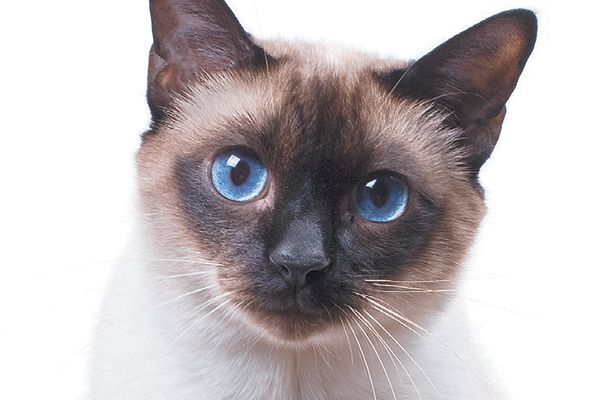

In [32]:
img_pil = Image.open("A-Siamese-cat.jpg")
img_pil

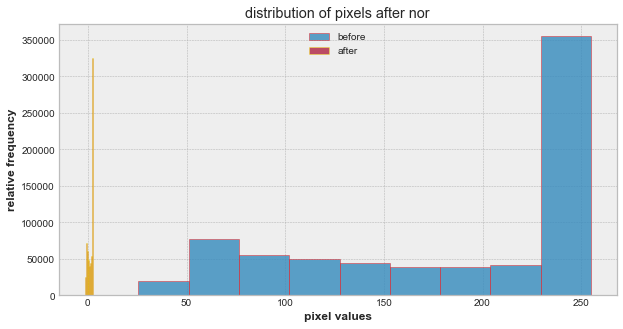

In [83]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.histograms import histogram
 

Img_org = np.array(img_pil).ravel()

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
])
normalized_img = transform(img_pil)
Img_transf = normalized_img.numpy().ravel()


plt.figure(figsize=[10,5])

# plotting first histogram
plt.hist(Img_org, label='before', alpha=.8, edgecolor='red')
 
# plotting second histogram
plt.hist(Img_transf, label='after', alpha=0.7, edgecolor='yellow')
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels after nor")
plt.legend()
 
# Showing the plot using plt.show()
plt.show()

# PyTorch nn Conv2d

In [129]:
from IPython.display import Image
Image(url='https://qph.cf2.quoracdn.net/main-qimg-b662a8fc3be57f76c708c171fcf29960') 

In [137]:
#The PyTorch nn conv2d is defined as a Two-dimensional convolution 
#that is applied over an input that is specified by the user and 
#the particular shape of the input is given in the form of channels, 
#length, and width, and output is in the form of convoluted manner.

#Conv= torch.nn.Conv2d(in_channels: int, out_channels: int, 
#kernel_size: Union[T, Tuple[T, T]], stride: Union[T, Tuple[T, T]] = 1, 
#padding: Union[T, Tuple[T, T]] = 0, dilation: Union[T, Tuple[T, T]] = 1, 
#groups: int = 1, bias: bool = True, padding_mode: str = 'zeros')

#The input to a 2D convolution layer must be of size (Color bands,number of Channels, Height, Weight) 
#of input tensor. 

#These arguments influence the size and behavior of the output tensor. 
#in_channels: refers to channels in input data. 
#out_channels: number of channels generated after the data convolves.
#kernel_size: the filter size.
#stride: the “steps” of the filter pixels-wise.
#padding: The number of pixels that are added to the data when it is being processed by the CNN filter in order to accomplish the task


def apply_conv2d(image,in_channels,out_channels,kernel_size,stride,padding,groups=1):
    conv1 = nn.Conv2d(in_channels=in_channels,
                      out_channels=out_channels,
                      kernel_size=kernel_size,
                      stride=stride,
                      padding=padding,
                      groups=groups)
    
    out_image = conv1(image)
    # convert image to PIL(pillow library) image
    #it is the pillow supported library to handle image
    img = T.ToPILImage()(out_image)
    #disply image
    #img.show()
    plt.figure(figsize=(10,6))
    imgplot = plt.imshow(img)
    plt.show()
    plt.close()

#Extract Image Metadata
def Displaying_Image_metadata(image):
    info_dict = {
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image Channels": np.array(image).shape[-1]
    #"Filename": image.filename,
    #,"Image Mode": image.mode,
    #"Image is Animated": getattr(image, "is_animated", False),
    #"Frames in Image": getattr(image, "n_frames", 1)
    }
    for label,value in info_dict.items():
        print(f"{label:25}: {value}")

Extract basic metadata from Image:
Image Size               : (600, 450)
Image Height             : 450
Image Width              : 600
Image Format             : JPEG
Image Mode               : RGB
Image Channels           : 3


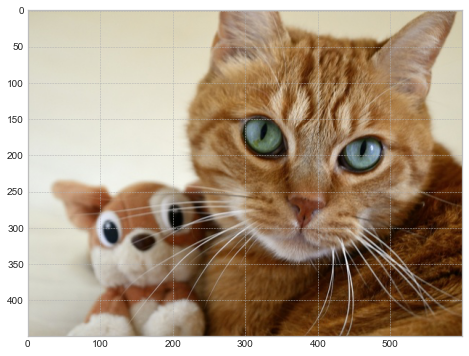

In [138]:
# Importing Libraries
import torch
import requests
import torchvision
from PIL import Image
import torchvision.transforms as Tr


url = 'https://images.all-free-download.com/images/graphiclarge/cat_small_cat_cats_eye_214515.jpg'
resp = requests.get(url)
image_bytes = io.BytesIO(resp.content)
img_pil = Image.open(image_bytes)
print('Extract basic metadata from Image:')
Displaying_Image_metadata(img_pil)
#img_pil
plt.figure(figsize=(10,6))
imgplot = plt.imshow(img_pil)
plt.show()

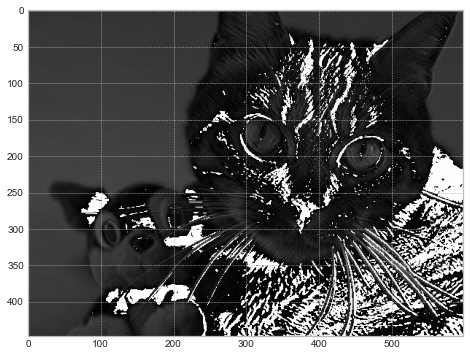

In [159]:
#(in_channels, out_channels, kernel_size)
#Setting Hyperparameters:
in_channels = 3
out_channels = 1
kernel_size =(5,5)   #(5*5)
stride = 1
padding = 1

# Read input image
img_pil = Image.open(image_bytes) #RGB
# convert image to torch tensor
img = Tr.ToTensor()(img_pil)
# CNN operation on image
apply_conv2d(img,in_channels,out_channels,kernel_size,stride,padding)

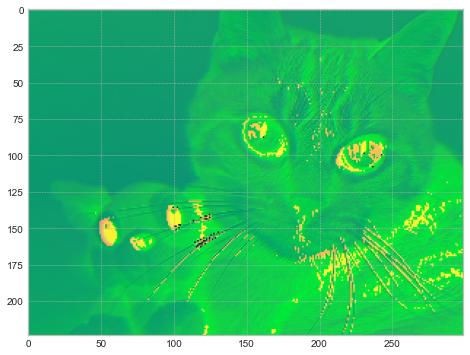

In [162]:
# Read input image
img_pil = Image.open(image_bytes) #RGB
# convert image to torch tensor
Tensor_img = Tr.ToTensor()(img_pil)

# With square kernels and equal stride
conv = nn.Conv2d(3, 3, 3, stride=2)
# CNN operation on image
out_image = conv(Tensor_img)

# convert image to PIL(pillow library) image, it is the pillow supported library to handle image
img = T.ToPILImage()(out_image)
#disply image
#img.show()
plt.figure(figsize=(10,6))
imgplot = plt.imshow(img)
plt.show()
plt.close()

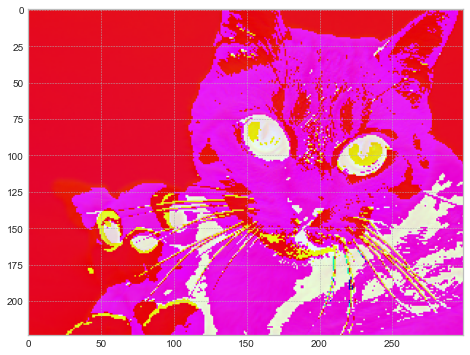

In [169]:
# Read input image
img_pil = Image.open(image_bytes) #RGB
# convert image to torch tensor
Tensor_img = Tr.ToTensor()(img_pil)

# With square kernels and equal stride
conv = nn.Conv2d(3, 3, 3, stride=2)
# CNN operation on image
out_image = conv(Tensor_img)

# Convert image to PIL(pillow library) image, it is the pillow supported library to handle image
img = T.ToPILImage()(out_image)

#disply image
plt.figure(figsize=(10,6))
imgplot = plt.imshow(img)
plt.show()
plt.close()

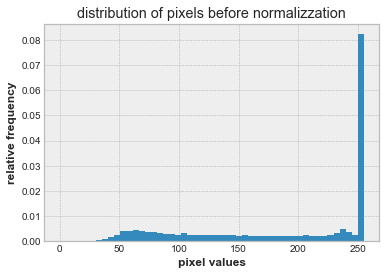

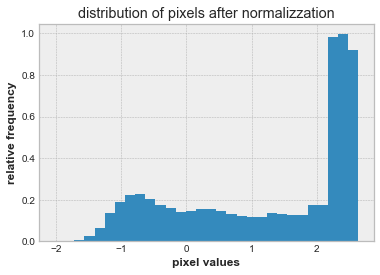

In [172]:
#Now, take a look at the distribution of pixel values:
img_pil = Image.open("A-Siamese-cat.jpg")
plt.hist(np.array(img_pil).ravel(), bins=50, density=True);
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels before normalizzation");
plt.show()


transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
])
normalized_img = transform(img_pil)
normalized_img[:1,:,:]

plt.hist(normalized_img.numpy().ravel(), bins=30, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels after normalizzation")
plt.show();